## Tutorial 3

## Fourier Series 

### 1) Find the Fourier series of the given function f (x), which is assumed to have the period 2𝜋
### 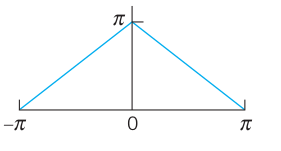
 
 

Text(0, 0.5, 'f(x)')

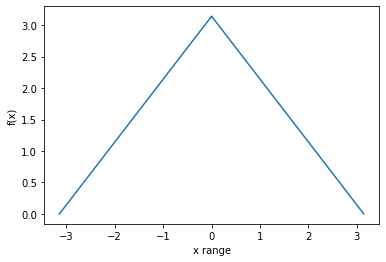

In [1]:
### Using Numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.integrate import quad
from math import* 

x=np.arange(-np.pi,np.pi,0.001)
#y=square(x)
y = np.zeros(len(x))
for i, j in enumerate(x):
    if j <= 0:
        y[i] = 1*j + np.pi
    else:
        y[i] = -1*j + np.pi


plt.plot(x,y)
plt.xlabel('x range')
plt.ylabel('f(x)')

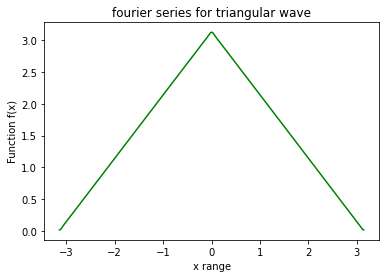

In [2]:
n=50 
An=[] 
Bn=[]
sum=0

### Define the integrand for An and Bn
fc = lambda x: (1*x + np.pi)*cos(i*x) if (x <= 0)  else (-1*x + np.pi)*cos(i*x)
fs = lambda x: (1*x + np.pi)*sin(i*x) if (x <= 0)  else (-1*x + np.pi)*sin(i*x)

for i in range(n):
     an=quad(fc,-np.pi,np.pi)[0]*(1.0/np.pi)
     An.append(an)

for i in range(n):
     bn=quad(fs,-np.pi,np.pi)[0]*(1.0/np.pi)
     Bn.append(bn) 

for i in range(n):
     if i==0.0:
         sum=sum+An[i]/2 #i.e -> A0
     else:
         sum=sum+(An[i]*np.cos(i*x)+Bn[i]*np.sin(i*x))

plt.plot(x,sum,'g')
#plt.plot(x,y,'r--')
plt.title("fourier series for triangular wave")
plt.xlabel('x range')
plt.ylabel('Function f(x)')
plt.show()

### 2)Find the two half-range expansions of a triangular function defined between x=0 to L 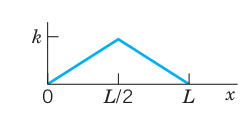

In [3]:
### Using Sympy
from sympy import *
from sympy import fourier_transform
from sympy.abc import x
from sympy import pi
from sympy import cos, sin
from sympy import symbols
k = symbols('k',real = True,positive = True)
L = symbols('L',real = True,positive = True)
n = symbols('n',real = True,positive = True)

In [4]:
#Even periodic extension
A0 = (1/L)*(integrate((2*k/L)*x,(x,0,L/2)) + integrate((2*k/L)*(L-x),(x,L/2,L)) ).simplify()
An = (2/L)*(integrate((2*k/L)*x*cos(n*x*pi/L),(x,0,L/2)) + integrate((2*k/L)*(L-x)*cos(n*x*pi/L),(x,L/2,L)) ).simplify()
f_x_even = A0 +An*cos(n*x*pi/L)
f_x_even                                                                            

k/2 + 4*k*(2*cos(pi*n/2) - cos(pi*n) - 1)*cos(pi*n*x/L)/(pi**2*n**2)

In [5]:
#Odd periodic extension
Bn = (2/L)*(integrate((2*k/L)*x*sin(n*x*pi/L),(x,0,L/2)) + integrate((2*k/L)*(L-x)*sin(n*x*pi/L),(x,L/2,L)) ).simplify()
f_x_odd = Bn
f_x_odd

4*k*(2*sin(pi*n/2) - sin(pi*n))/(pi**2*n**2)

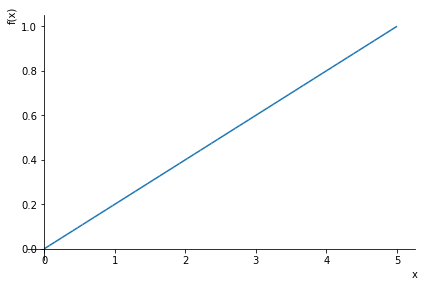

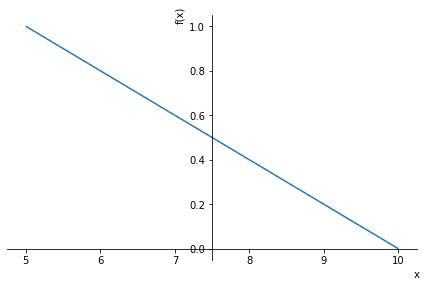

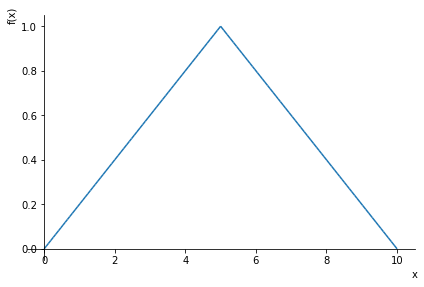

In [6]:
from sympy.plotting import plot
p1 = plot((2/10)*x,(x,0,10/2)) #k=1 , L=10
p2 =  plot((2/10)*(10-x),(x,10/2,10))
p1.extend(p2)
p1.show()

In [17]:
### Even expansion
AN = 0
for i in range(10):
    a=i+1
    AN += An.subs([(k,1),(n,a),(pi,3.14),(L,10)])*cos(n*x*pi/L).subs([(n,a),(pi,3.14),(L,10)])
even_ext = A0.subs(k,1) + AN

In [8]:
### Odd expansion
BN = 0
for i in range(10):
    a=i+1
    BN += Bn.subs([(k,1),(n,a),(pi,3.14),(L,10)])*sin(n*x*pi/L).subs([(n,a),(pi,3.14),(L,10)])
odd_ext = BN

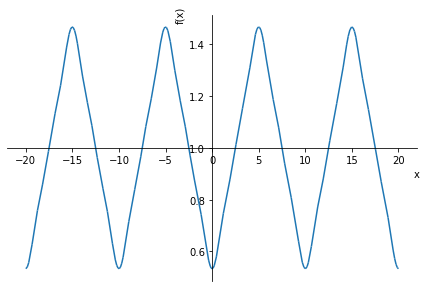

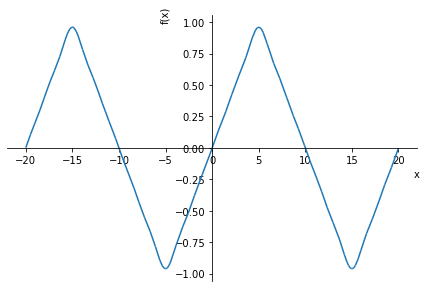

In [16]:
p4 = plot(even_ext,(x,-20,20))
p5 = plot(odd_ext,(x,-20,20))
#p1.extend(p4)
#p1.extend(p5)
#p1.show()

## Fourier Integral 

### 3) Find the Fourier integral representation of the function 
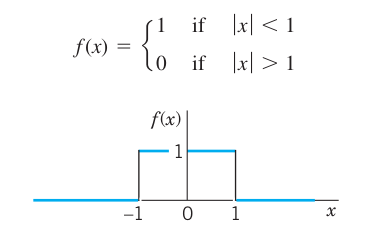

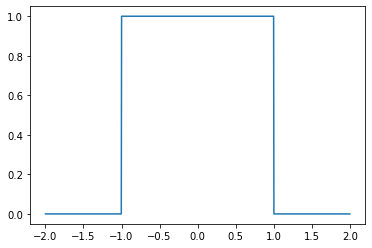

In [10]:
import matplotlib.pyplot as plot
import numpy as np

## Define the function
def func(xvals):
    yvals = np.zeros(len(xvals))
    for i, j in enumerate(xvals):
        if abs(j) < 1:
            yvals[i] = 1
        if abs(j) > 1 :
            yvals[i] = 0
    return yvals
    
xvals = np.linspace(-2, 2, 1000, endpoint=True)
f_x = func(xvals)
# Plot the square wave signal
plot.plot(xvals,f_x)

In [11]:
from sympy.abc import w,v
A_w = (1/pi)*integrate(1*cos(w*v),(v,-1,1))
B_w = (1/pi)*integrate(1*sin(w*v),(v,-1,1))

F_x = integrate((A_w*cos(w*x)+B_w*sin(w*x)),(w,0,8))
F_x

-Si(8*x - 8)/pi + Si(8*x + 8)/pi

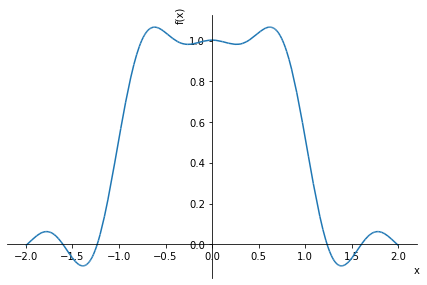

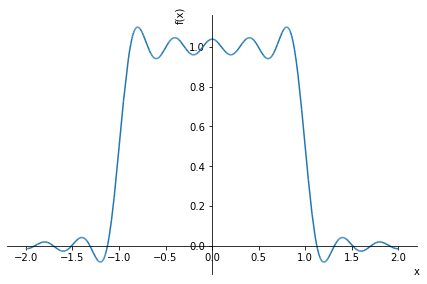

KeyboardInterrupt: 

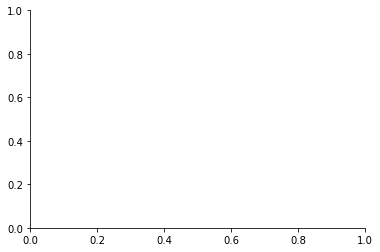

In [12]:
### Check for different values of w as the limit of integration
from sympy.plotting import plot

limit_range = [8,16,32]
def fourier_approximation(limit_range,A_w,B_w):
    F_x_approximation = [] 
    for i, j in enumerate(limit_range):
        F_x_approximation.append((integrate((A_w*cos(w*x)+B_w*sin(w*x)),(w,0,j))).subs(pi,3.14))
    return F_x_approximation

F_x_approximation = fourier_approximation(limit_range,A_w,B_w)
F_x_approximation
a1 = plot(F_x_approximation[0],(x,-2,2))  
a2 = plot(F_x_approximation[1],(x,-2,2))
a3 = plot(F_x_approximation[2],(x,-2,2))


In [ ]:
sine_integral = integrate(sin(w)/w , (w,0,oo))

In [ ]:
sine_integral.simplify()

In [ ]:
from sympy.abc import u
t1 = plot(Si(u),(u,-4*pi,4*pi))
t2 = plot(sin(w)/w , (w,-4*pi,4*pi))
t1.extend(t2)
t1.show()

### 4) Obtain the Fourier transform of the following 
$$ a) xe^{-x}{^2} $$



In [18]:
#Using built-in function
ft1 = fourier_transform((x*exp(-x**2)), x,k)
ft1

-I*pi**(3/2)*k*exp(-pi**2*k**2)

In [19]:
#using sympy integrate
from sympy.abc import x,a,b
from sympy import pi ,I
w = symbols('w',real = True,positive = True)
i = symbols('i',real = False)
ft2 = (1/sqrt(2*pi))*integrate((x*exp(-x**2))*exp(-I*w*x),(x,-oo,oo)).simplify()
ft2

-sqrt(2)*I*w*exp(-w**2/4)/4

### 5) Find a general solution of the ODE 𝑦′′ + 𝑤$^{2}$𝑦 = 𝑟(𝑡)  with r (t) as sin (t) 

In [ ]:
### take w = 0.5

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size':18})

L = 12
N = 100
dt = L/N
t = np.arange(0,L,dt)
kappa = np.pi*np.fft.fftfreq(N,d =dt)

In [ ]:
#def r(t)
def r_t(t):
    return np.sin(t)

def rhs_ft(t,kappa):
    rhs_num = np.fft.fft(r_t(t))
    rhs_deno = (-1*kappa**2 + 0.5**2)
    return (rhs_num/rhs_deno)

y_hat = rhs_ft(t,kappa)
y = np.fft.ifft(y_hat)
y_soln = y.real

In [ ]:
plt.plot(t,y_soln)
plt.xlabel('t')
plt.ylabel('solution y')
#plt.plot(t,exp)

In [ ]:
#Obtaining the complementary function using sympy

from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x, w ,y, L,t
from sympy import pi,exp

y = Function('y')
w = symbols('w',real = True,positive = True) 
y_t = dsolve(Derivative(y(t), t,t) + w**2*y(t) -sin(t),y(t))
y_t

### 1) Find the fourier series of the given function

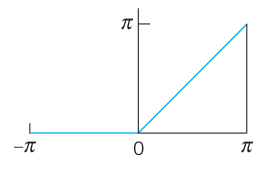

### 2) Find the cosine transform f $_{c}$ (w) of f(x) = 1 if 0< x< 1, f(x) = -1 if 1< x <2, f (x) =  0 if x > 2

### 3)
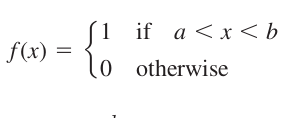


### 4) b) Find a general solution of the ODE 𝑦′′ + 𝑤$^{2}$𝑦 = 𝑟(𝑡)  with r (t) as 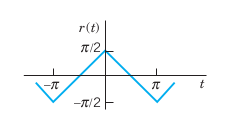

Text(0, 0.5, 'f(x)')

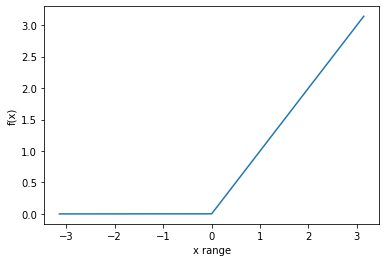

In [1]:
### Using Numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.integrate import quad
from math import* 

x=np.arange(-np.pi,np.pi,0.001)
#y=square(x)
y = np.zeros(len(x))
for i, j in enumerate(x):
    if j <= 0:
        y[i] = 0
    else:
        y[i] = 1*j 


plt.plot(x,y)
plt.xlabel('x range')
plt.ylabel('f(x)')

In [ ]:
n=50 
An=[] 
Bn=[]
sum=0

### Define the integrand for An and Bn
fc = lambda x: (0)*cos(i*x) if (x <= 0)  else (1*x )*cos(i*x)
fs = lambda x: (0)*sin(i*x) if (x <= 0)  else (1*x )*sin(i*x)

for i in range(n):
     an=quad(fc,-np.pi,np.pi)[0]*(1.0/np.pi)
     An.append(an)

for i in range(n):
     bn=quad(fs,-np.pi,np.pi)[0]*(1.0/np.pi)
     Bn.append(bn) 

for i in range(n):
     if i==0.0:
         sum=sum+An[i]/2 #i.e -> A0
     else:
         sum=sum+(An[i]*np.cos(i*x)+Bn[i]*np.sin(i*x))

plt.plot(x,sum,'g')
#plt.plot(x,y,'r--')
plt.title("fourier series for triangular wave")
plt.xlabel('x range')
plt.ylabel('Function f(x)')
plt.show()

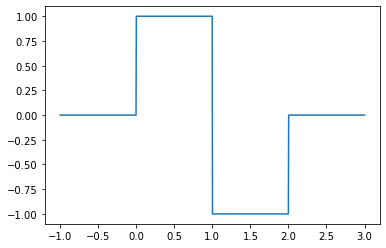

In [1]:
import matplotlib.pyplot as plot
import numpy as np

## Define the function
def func(xvals):
    yvals = np.zeros(len(xvals))
    for i, j in enumerate(xvals):
        if j < 0:
            yvals[i] = 0
        if j < 1 and j > 0:
            yvals[i] = 1
        if j < 2 and j > 1:
            yvals[i] = -1
        if j > 2:
            yvals[i] = 0
    return yvals
    
xvals = np.linspace(-1, 3, 1000, endpoint=True)
f_x = func(xvals)
plot.plot(xvals,f_x)